In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 데이터 읽어오기
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")
submission = pd.read_csv("./data/gender_submission.csv")

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [6]:
np.random.seed(1234)

## 탐색적 데이터 해석

In [7]:
# 데이터의 행과 열 확인
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [8]:
# 표시할 수 있는 행과 열 갯수 지정
pd.set_option("display.max_columns", 50) # 표시할 수 있는 열 제한수 설정
pd.set_option("display.max_rows", 50) # 표시할 수 있는 행 제한수 설정

In [9]:
# 데이터 내용 미리보기
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
# 수치데이터의 여러 통계정보 파악
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [14]:
# 카테고리 변수 확인하기
train_df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
train_df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
train_df["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [17]:
# 결측치 확인하기 (Null)
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## 데이터의 시각화



In [19]:
# 시각화용 lib 불러오기
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
plt.style.use("ggplot")

### 목적 변수(Survived) 관련 데이터의 시각화


In [21]:
# 데이터프레임에서 임의의 열 추출하기
train_df[["Embarked", "Survived", "PassengerId"]]

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [22]:
# 결측치를 포함한 행 제외하기
train_df[["Embarked", "Survived", "PassengerId"]].dropna() # Embarked열에 결측치 2개가 있으므로 해당 행 제외

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [23]:
# Embarked와 Survived로만 집계하기
train_df[["Embarked", "Survived", "PassengerId"]].dropna().groupby(["Embarked", "Survived"]).count()

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

In [24]:
# 데이터를 # 수평으로 변환하기
embarked_df = train_df[["Embarked", "Survived", "PassengerId"]].dropna().groupby(["Embarked", "Survived"]).count().unstack()
embarked_df

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  217

<AxesSubplot:xlabel='Embarked'>

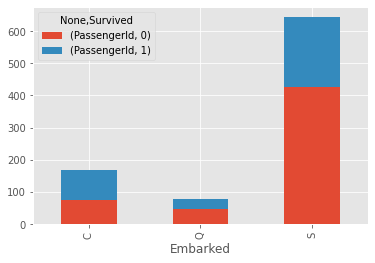

In [25]:
# 누적 막대 그래프로 시각화하기
embarked_df.plot.bar(stacked=True)

In [26]:
# 수치로 확인하기 : .iloc으로 임의의 행과 열을 추출
embarked_df["survived_rate"] = embarked_df.iloc[:,1] / (embarked_df.iloc[:,0] + embarked_df.iloc[:,1]) 
embarked_df

PassengerId      survived_rate
Survived           0    1              
Embarked                               
C                 75   93      0.553571
Q                 47   30      0.389610
S                427  217      0.336957

<AxesSubplot:xlabel='Sex'>

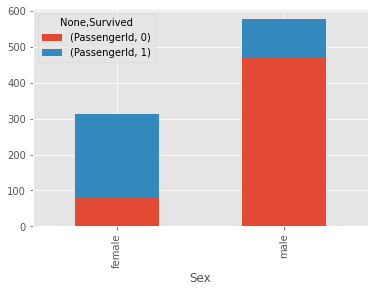

In [27]:
sex_df = train_df[["Sex", "Survived", "PassengerId"]].dropna().groupby(["Sex", "Survived"]).count().unstack()
sex_df.plot.bar(stacked=True)

<AxesSubplot:xlabel='Pclass'>

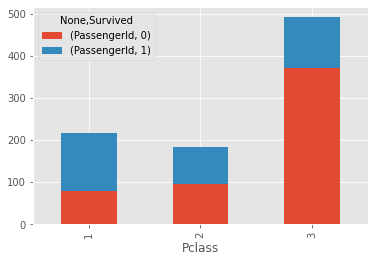

In [28]:
ticket_df = train_df[["Pclass", "Survived", "PassengerId"]].dropna().groupby(["Pclass", "Survived"]).count().unstack()
ticket_df.plot.bar(stacked=True)

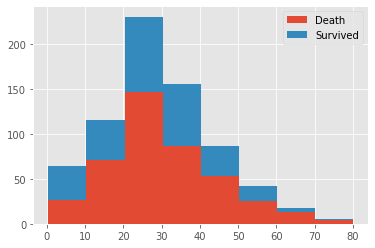

In [29]:
# 연령별 생존율을 히스토그램으로 시각화하기
plt.hist(x=[train_df.Age[train_df.Survived==0], train_df.Age[train_df.Survived==1]], bins=8, histtype='barstacked', label=["Death", "Survived"])
plt.legend()

In [30]:
# 카테고리 변수를 더미 변수화하기 (수치데이터화 하기 위해 그 값인지 여부를 1, 0로 나타내기)
train_df_corr = pd.get_dummies(train_df, columns=["Sex"], drop_first=True)
train_df_corr = pd.get_dummies(train_df_corr, columns=["Embarked"])
train_df_corr.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,0,1


In [31]:
# 상관 행렬 작성하기 : 각 항목의 상관관계를 보기 위해 상관계수로 이루어진 행렬을 작성한다.
train_corr = train_df_corr.corr()
train_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.081720
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,0.036261,-0.022405,-0.032523
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.166603
Sex_male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,-0.001205,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.778359
Embarked_Q,-0.033606,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.496624


<AxesSubplot:>

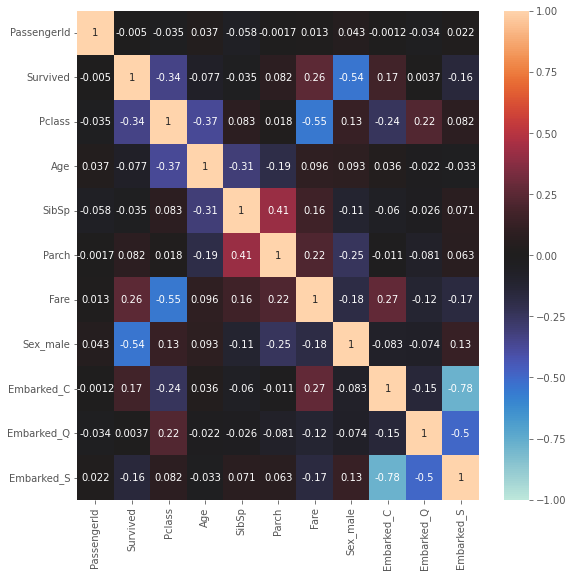

In [32]:
# 히트맵(씨본)으로 시각화하기
plt.figure(figsize=(9,9))
sns.heatmap(train_corr, vmax=1, vmin=-1, center=0, annot=True)

## 데이터 전처리와 특징 값 생성

In [33]:
# 학습 데이터와 테스트 데이터의 통합
all_df = pd.concat([train_df,test_df], sort=False).reset_index(drop=True)
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [34]:
# 전체 데이터로 결측치 수 확인하기
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [35]:
# 결측치 메우기(Fare)
Fare_mean = all_df[["Pclass","Fare"]].groupby("Pclass").mean().reset_index()
Fare_mean.columns = ["Pclass", "Fare_mean"]
Fare_mean

,Pclass,Fare_mean
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [36]:
all_df = pd.merge(all_df, Fare_mean, on="Pclass", how="left") #merge 기능을 아직 이해 못함. 나중에 다시 보자.
all_df.loc[(all_df["Fare"].isnull()),"Fare"] = all_df["Fare_mean"]
all_df = all_df.drop("Fare_mean", axis=1)

In [37]:
# Name 호칭에 주목하기
all_df["Name"].head(5)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [38]:
name_df = all_df["Name"].str.split("[,.]", 2, expand=True) # 쉼표(,), 마침표(.)로 구분해서 2번째에 나오는 요소를 호칭으로 저장
name_df.columns = ["family_name", "honorific", "name"] # split결과 index가 열명으로 들어가므로 따로 열명을 지정해줘야 함.
name_df

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [39]:
# 혹시나 선두와 말미에 공백문자가 남아있는 경우에 대비해 strip해놓기
name_df["family_name"] = name_df["family_name"].str.strip()
name_df["honorific"] = name_df["honorific"].str.strip()
name_df["name"] = name_df["name"].str.strip()

In [40]:
# 호칭마다 인원수 세기
name_df["honorific"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: honorific, dtype: int64

In [41]:
# 호칭별 연령 분포 확인하기
all_df = pd.concat([all_df,name_df], axis=1)
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick


<AxesSubplot:xlabel='honorific', ylabel='Age'>

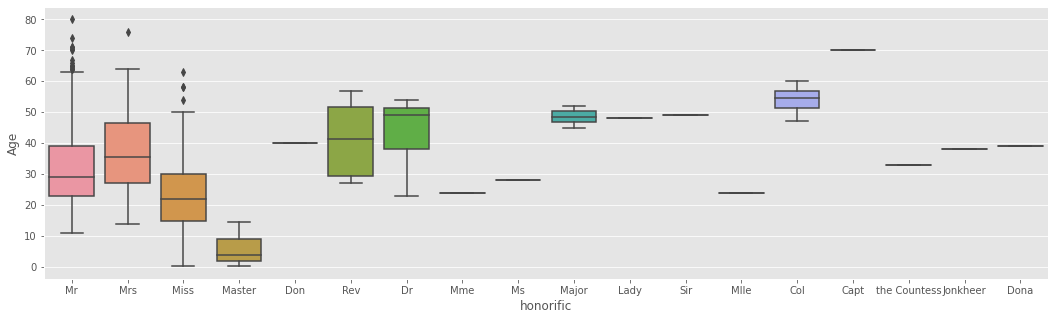

In [42]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="honorific", y="Age", data=all_df)

In [43]:
# 호칭별 연령 평균값 확인하기
all_df[["Age","honorific"]].groupby("honorific").mean()

,Age
honorific,
Capt,70.000000
Col,54.000000
Don,40.000000
Dona,39.000000
Dr,43.571429
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,5.482642


In [44]:
# 호칭별 생존율 차이 확인하기

train_df = pd.concat([train_df,name_df[0:len(train_df)].reset_index(drop=True)], axis=1)
test_df = pd.concat([test_df,name_df[0:len(test_df)].reset_index(drop=True)], axis=1)

<AxesSubplot:xlabel='honorific'>

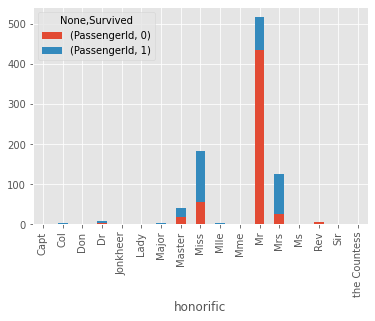

In [45]:
honorific_df = train_df[["honorific", "Survived", "PassengerId"]].dropna().groupby(["honorific","Survived"]).count().unstack()
honorific_df.plot.bar(stacked=True)

In [46]:
# 연령의 결측치를 호칭별 평균 연령으로 보완하기
honorific_age_mean = all_df[["honorific","Age"]].groupby("honorific").mean().reset_index()
honorific_age_mean.columns = ["honorific","honorific_Age"]
all_df = pd.merge(all_df, honorific_age_mean, on="honorific", how="left")
all_df.loc[(all_df["Age"].isnull()),"Age"] = all_df["honorific_Age"]
all_df = all_df.drop(["honorific_Age"], axis=1)

In [47]:
# 가족 인원수 추가하기
all_df["family_num"] = all_df["Parch"] + all_df["SibSp"]
all_df["family_num"].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: family_num, dtype: int64

In [48]:
# 홀로 승선했는지 여부를 새로운 변수로 추가하기
all_df.loc[all_df["family_num"]==0,"alone"] = 1
all_df["alone"].fillna(0,inplace=True)

In [49]:
# 불필요한 변수 삭제하기
all_df = all_df.drop(["PassengerId", "Name", "family_name", "name", "Ticket", "Cabin"], axis=1)
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


In [50]:
# 카테고리 변수를 수치로 변환하기
categories = all_df.columns[all_df.dtypes=="object"]
print(categories)

Index(['Sex', 'Embarked', 'honorific'], dtype='object')


In [51]:
# Mr, Miss, Mrs, Master 이외의 호칭은 other로 통합하기
all_df.loc[~((all_df["honorific"]=="Mr")|(all_df["honorific"]=="Miss")|(all_df["honorific"]=="Mrs")|(all_df["honorific"]=="Master")),"honorific"] = "other"
all_df.honorific.value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
other      34
Name: honorific, dtype: int64

In [52]:
# 문자열을 수치로 변환하기: 라벨 인코딩

#라벨 인코딩을 사용하기 위해서 sklearn에서 labelencoder를 import해와야함
from sklearn.preprocessing import LabelEncoder

#labelencoder()는 결측치가 있으면 작동하지 않으므로 embarked에 포함된 결측치는 missing등 임의의 문자열로 미리 치환
all_df["Embarked"].fillna("missing", inplace=True)
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


In [53]:
le = LabelEncoder()
le = le.fit(all_df["Sex"])
all_df["Sex"] = le.transform(all_df["Sex"])

In [54]:
# 나머지 카테고리 변수들도 수치로 변환하기
for cat in categories:
    le = LabelEncoder()
    print(cat)
    if all_df[cat].dtypes == "object":
        le = le.fit(all_df[cat])
        all_df[cat] = le.transform(all_df[cat])

Sex
Embarked
honorific


In [55]:
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,1,22.0,1,0,7.2500,2,2,1,0.0
1,1.0,1,0,38.0,1,0,71.2833,0,3,1,0.0
2,1.0,3,0,26.0,0,0,7.9250,2,1,0,1.0
3,1.0,1,0,35.0,1,0,53.1000,2,3,1,0.0
4,0.0,3,1,35.0,0,0,8.0500,2,2,0,1.0


In [56]:
# 모든 데이터를 학습 데이터와 테스트 데이터로 되돌리기

# Survived 값이 null이 아닐 때는 학습데이터로 하고, nul일 때는 테스트 데이터로 한다.
# train_X, test_X : 설명 변수 / train_Y : 목적변수 (Survived)
train_X = all_df[~all_df["Survived"].isnull()].drop("Survived", axis=1).reset_index(drop=True)
train_Y = train_df["Survived"]

test_X = all_df[all_df["Survived"].isnull()].drop("Survived", axis=1).reset_index(drop=True)

## 머신 러닝 모델링

In [57]:
# gradient boosting decision tree 기법중 하나인  LightGBM을 사용하기로 함.
import lightgbm as lgb

In [58]:
# 과적합을 피하기 위한 홀드아웃 & 교차검증 실습
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

### 홀드아웃

In [59]:
# 학습 데이터의 20%를 검증 데이터로 분할하기
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size=0.2) # 잘 이해 못하겠음

In [60]:
# 카테고리 변수를 지정한 후 LightGBM용 데이터셋을 작성

#이부분 전혀 모르겠음
categories = ["Embarked", "Pclass", "Sex", "honorific", "alone"]
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)
# lgb_eval 뒤에 reference를 붙이면 에러 발생, 뗐더니 괜찮아짐

In [61]:
# 하이퍼파라미터 설정하기
lgbm_params = {
    "objective":"binary",
    "random_seed":1234
}

In [62]:
# LightGBM으로 머신 러닝 모델 학습시키기
model_lgb = lgb.train(lgbm_params,
                     lgb_train,
                     valid_sets=lgb_eval,
                     num_boost_round=100,
                     early_stopping_rounds=20,
                     verbose_eval=10)

[LightGBM] [Info] Number of positive: 272, number of negative: 440
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382022 -> initscore=-0.480973
[LightGBM] [Info] Start training from score -0.480973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [63]:
model_lgb.feature_importance()

array([ 34,  19, 184,  20,   8, 241,  27,   3,  19,   0], dtype=int32)

<AxesSubplot:>

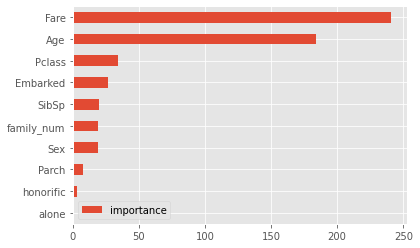

In [64]:
importance = pd.DataFrame(model_lgb.feature_importance(), index=X_train.columns, columns=["importance"]).sort_values(by="importance", ascending =True)
importance.plot.barh()

In [65]:
# 검증 데이터로 예측 정확도 확인
y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, np.round(y_pred))

0.8435754189944135

In [67]:
# 하이퍼파라미터 변경하기
lgbm_params = {
    "objective":"binary",
    "max_bin":331,
    "num_leaves":20,
    "min_data_in_leaf":57,
    "random_seed":1234
}

In [68]:
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)#, reference=lgb_train생략

In [69]:
model_lgb = lgb.train(lgbm_params,
                      lgb_train,
                      valid_sets=lgb_eval,
                      num_boost_round=100,
                      early_stopping_rounds=20,
                      verbose_eval=10)

[LightGBM] [Info] Number of positive: 272, number of negative: 440
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000746 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382022 -> initscore=-0.480973
[LightGBM] [Info] Start training from score -0.480973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

In [70]:
y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)


In [71]:
accuracy_score(y_valid, np.round(y_pred))

0.8435754189944135

### 교차검증 (3-fold)

In [72]:
folds = 3
kf = KFold(n_splits=folds)

In [73]:
models = []

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
        
    lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
    lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)    
    
    model_lgb = lgb.train(lgbm_params, 
                          lgb_train, 
                          valid_sets=lgb_eval, 
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                         )
    
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    print(accuracy_score(y_valid, np.round(y_pred)))
    
    models.append(model_lgb)

[LightGBM] [Info] Number of positive: 236, number of negative: 358
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000329 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 206
[LightGBM] [Info] Number of data points in the train set: 594, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.397306 -> initscore=-0.416701
[LightGBM] [Info] Start training from score -0.416701
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [74]:
preds = []
for model in models:
    pred = model.predict(test_X)
    preds.append(pred)

In [75]:
preds_array = np.array(preds)
preds_mean = np.mean(preds_array, axis=0)

In [76]:
preds_int = (preds_mean > 0.5).astype(int)
submission["Survived"] = preds_int

In [77]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [78]:
submission.to_csv("./submit/titanic_submit01.csv", index=False)